# Predicitng the Walmart Sales

###Importing libraries

In [ ]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
features=pandas.read_csv('features.csv')
stores=pandas.read_csv('stores.csv')
test=pandas.read_csv('test.csv')
train=pandas.read_csv('train.csv')


In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features.shape

(8190, 12)

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
test.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [ ]:
Types=stores['Type'].value_counts().index
Values=stores['Type'].value_counts().values

In [ ]:
import plotly.graph_objs as go 

In [ ]:
figure=go.Figure(data=[go.Pie(labels=Types, values=Values, textinfo='label+percent')])
figure.show()

###Merging the features and stores df 

In [ ]:
dataset=features.merge(stores, how='inner', on='Store')
dataset.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
Departments=train['Dept'].value_counts()[:10].index
Values=train.value_counts()[:10].values

In [ ]:
figure=go.Figure(data=[go.Pie(labels=Departments, values=Values, textinfo='label+percent')])
figure.show()

In [ ]:
Holidays=train['IsHoliday'].value_counts().index
Values=train['IsHoliday'].value_counts().values

In [ ]:
figure=go.Figure(data=[go.Pie(labels=Holidays, values=Values, textinfo='label+percent')])
figure.show()

###Conversion of date to datetime format

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
test.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
from datetime import datetime

In [ ]:
dataset['Date']=pandas.to_datetime(dataset['Date'])
train['Date']=pandas.to_datetime(train['Date'])
test['Date']=pandas.to_datetime(test['Date'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


#####Creating week and year columns

In [ ]:
dataset['Week']=dataset.Date.dt.week
dataset['Year']=dataset.Date.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
dataset.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Week,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,2010
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,6,2010


In [ ]:
merged_train_df=train.merge(dataset, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(['Store', 'Dept', 'Date'])

In [ ]:
merged_test_df=test.merge(dataset, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(['Store', 'Dept', 'Date'])

In [ ]:
def scatter(merged_train_df, column):
  plt.figure()
  plt.scatter(merged_train_df[column], merged_train_df['Weekly_Sales'])
  plt.xlabel(column)
  plt.ylabel('Weekly_Sales')


###Checking Sales for an year for every week of the year


In [ ]:
weekly_sales_2010=merged_train_df[merged_train_df['Year']==2010]['Weekly_Sales'].groupby(merged_train_df['Week']).mean()

In [ ]:
weekly_sales_2011=merged_train_df[merged_train_df['Year']==2011]['Weekly_Sales'].groupby(merged_train_df['Week']).mean()

In [ ]:
weekly_sales_2012=merged_train_df[merged_train_df['Year']==2012]['Weekly_Sales'].groupby(merged_train_df['Week']).mean()

Text(0, 0.5, 'weekly sales')

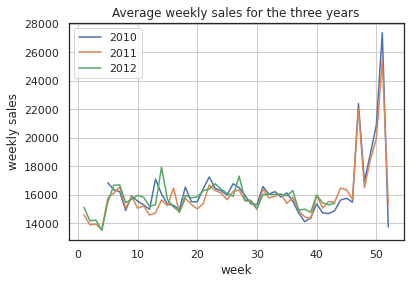

In [ ]:
plt.grid()
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values)
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values)
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.legend(['2010', '2011', '2012'])
plt.title('Average weekly sales for the three years')
plt.xlabel('week')
plt.ylabel('weekly sales')

###Department-wise sales

In [ ]:
weekly_sales_dept=merged_train_df['Weekly_Sales'].groupby(merged_train_df['Dept']).mean()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Average sales fore each department')

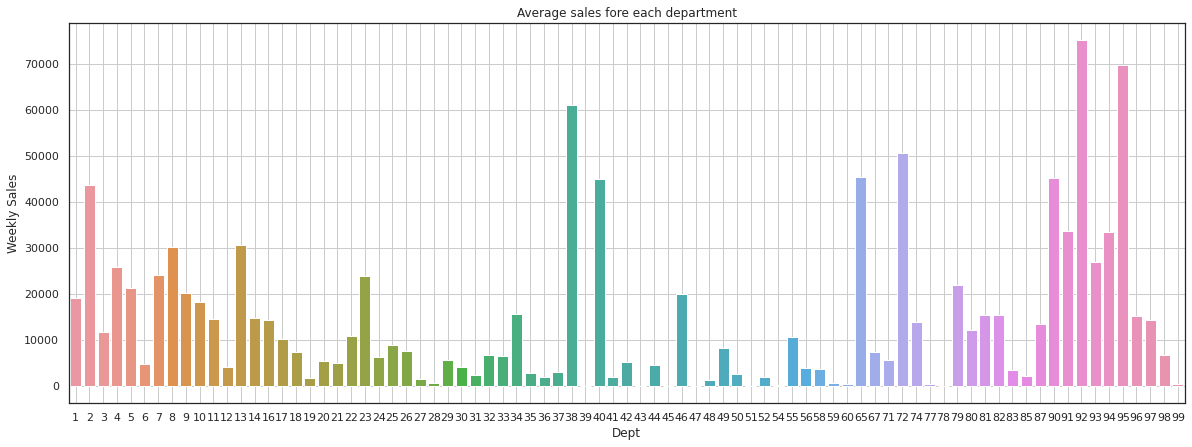

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(weekly_sales_dept.index, weekly_sales_dept.values)
plt.grid()
plt.xlabel('Dept')
plt.ylabel('Weekly Sales')
plt.title('Average sales fore each department')


###Correlation map

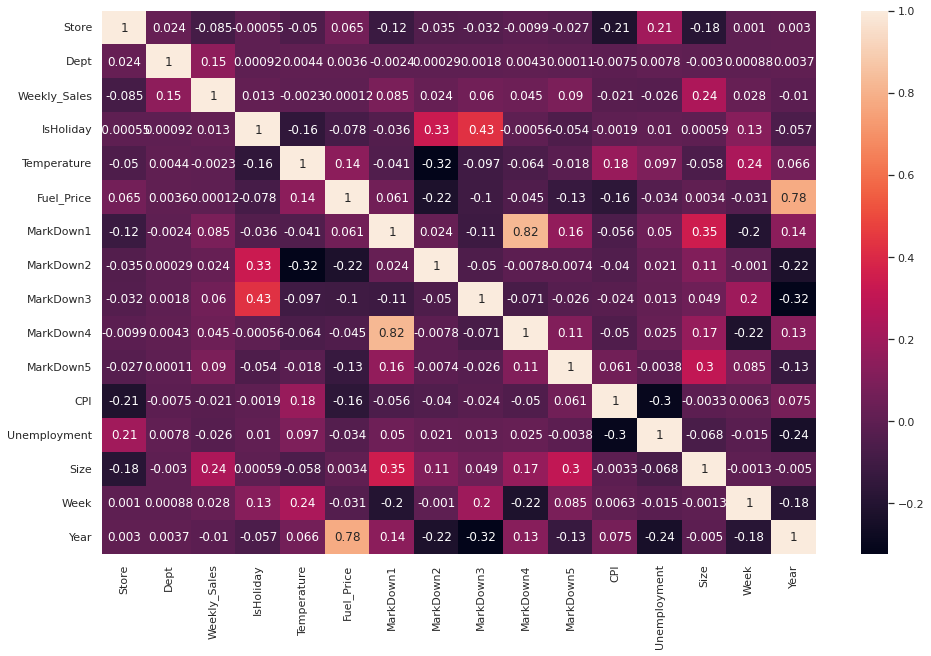

In [ ]:
plt.figure(figsize=(16,10))
sns.set(style='white')
correlation_matrix=merged_train_df.corr()
sns.heatmap(correlation_matrix, annot=True) 

In [ ]:
merged_train_df=merged_train_df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

In [ ]:
merged_test_df=merged_test_df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

###Splitting the df

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=merged_train_df[['Store', 'Dept', 'IsHoliday', 'Size', 'Week', 'Year']]
y=merged_train_df['Weekly_Sales']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=40)

###Model fitting

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred=regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt

In [ ]:
print("Root mean square error for train set: ", sqrt(mse(y_train.values, y_train_pred)))

Root mean square error for train set:  21702.392420639637


In [ ]:
print("R-squared value for train set: ", r2_score(y_train.values, y_train_pred))

R-squared value for train set:  0.08466604187293436


In [ ]:
print("Root mean square error for test set: ", sqrt(mse(y_test.values, y_test_pred)))

Root mean square error for test set:  21797.181422004935


In [ ]:
print("R-squared value for test set: ", r2_score(y_test.values, y_test_pred))

R-squared value for test set:  0.08399113566321481


### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_train_pred_dt=dt.predict(X_train)
y_test_pred_dt=dt.predict(X_test)

In [ ]:
print('root mean squared error for train set: ', sqrt(mse(y_train.values,y_train_pred_dt )))

root mean squared error for train set:  1.6837022237822448e-17


In [ ]:
print('r-squared value for train set: ', r2_score(y_train.values, y_train_pred_dt))

r-squared value for train set:  1.0


In [ ]:
print('root mean squared error for test set: ', sqrt(mse(y_train.values,y_train_pred_dt )))

root mean squared error for test set:  1.6837022237822448e-17


In [ ]:
print('r-squared value for test set: ', r2_score(y_train.values, y_train_pred_dt))

r-squared value for test set:  1.0


#We had used two models to predict the sales and it can be seeen that decision tree performs better pediction over the data thereby giving almost an ideal r-squared value.